# Data Science 410 BB
## Univerity of Washington Professional & Continuing Education

### Homework N: title
### Leo Salemann
### date


# Abstract

The heating load of buildings depends on ... Evidence for this relationship can be seen by ... in the figure and by noting .... in the table above.

# Appendix

## Load and examine the data set

In [1]:
read.energy = function(file = 'EnergyEfficiencyData.csv'){
  ## Read the csv file
  bldg.energy <- read.csv(file, header = TRUE, 
                      stringsAsFactors = FALSE)

 
  ## Remove cases or rows with missing values. In this case we keep the 
  ## rows which do not have nas. 
  # bldg.energy[complete.cases(bldg.energy), ]
}

bldg.energy = read.energy()

In [2]:
str(bldg.energy)

'data.frame':	768 obs. of  10 variables:
 $ Relative.Compactness     : num  0.98 0.98 0.98 0.98 0.9 0.9 0.9 0.9 0.86 0.86 ...
 $ Surface.Area             : num  514 514 514 514 564 ...
 $ Wall.Area                : num  294 294 294 294 318 ...
 $ Roof.Area                : num  110 110 110 110 122 ...
 $ Overall.Height           : num  7 7 7 7 7 7 7 7 7 7 ...
 $ Orientation              : int  2 3 4 5 2 3 4 5 2 3 ...
 $ Glazing.Area             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Glazing.Area.Distribution: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Heating.Load             : num  15.6 15.6 15.6 15.6 20.8 ...
 $ Cooling.Load             : num  21.3 21.3 21.3 21.3 28.3 ...


Okay, we've got 780 observations at ten variables each. Lots of repeat values in each variable. I'm going to assume Height means number of stories. Let's pull up some sats ...

## Summary Statistics

In [3]:
summary (bldg.energy)

 Relative.Compactness  Surface.Area     Wall.Area       Roof.Area    
 Min.   :0.6200       Min.   :514.5   Min.   :245.0   Min.   :110.2  
 1st Qu.:0.6825       1st Qu.:606.4   1st Qu.:294.0   1st Qu.:140.9  
 Median :0.7500       Median :673.8   Median :318.5   Median :183.8  
 Mean   :0.7642       Mean   :671.7   Mean   :318.5   Mean   :176.6  
 3rd Qu.:0.8300       3rd Qu.:741.1   3rd Qu.:343.0   3rd Qu.:220.5  
 Max.   :0.9800       Max.   :808.5   Max.   :416.5   Max.   :220.5  
 Overall.Height  Orientation    Glazing.Area    Glazing.Area.Distribution
 Min.   :3.50   Min.   :2.00   Min.   :0.0000   Min.   :0.000            
 1st Qu.:3.50   1st Qu.:2.75   1st Qu.:0.1000   1st Qu.:1.750            
 Median :5.25   Median :3.50   Median :0.2500   Median :3.000            
 Mean   :5.25   Mean   :3.50   Mean   :0.2344   Mean   :2.812            
 3rd Qu.:7.00   3rd Qu.:4.25   3rd Qu.:0.4000   3rd Qu.:4.000            
 Max.   :7.00   Max.   :5.00   Max.   :0.4000   Max.   :5.000     

Looks like we got lucky; data's pretty clean - no strings in the numerics, min/max seem reasonable. Let's look at standard devations.

In [4]:
lapply(bldg.energy, sd)

$Relative.Compactness
[1] 0.1057775

$Surface.Area
[1] 88.08612

$Wall.Area
[1] 43.62648

$Roof.Area
[1] 45.16595

$Overall.Height
[1] 1.75114

$Orientation
[1] 1.118763

$Glazing.Area
[1] 0.1332206

$Glazing.Area.Distribution
[1] 1.55096

$Heating.Load
[1] 10.0902

$Cooling.Load
[1] 9.513306

Surface/Roof/Wall areas have the most deviation, follwed by Heating and Cooling load. Height, orientation, and Glazing Area are remmarkably similar.  

Let's gather up all the 'compact' variables into one subset

Next up: A quick head/tail check.

In [5]:
bldg.compact = bldg.energy[, c('Relative.Compactness', 
                               'Overall.Height',
                               'Orientation', 'Glazing.Area', 
                               'Glazing.Area.Distribution')]

## Examine data frames

In [6]:
head(bldg.energy)

Relative.Compactness,Surface.Area,Wall.Area,Roof.Area,Overall.Height,Orientation,Glazing.Area,Glazing.Area.Distribution,Heating.Load,Cooling.Load
0.98,514.5,294.0,110.25,7,2,0,0,15.55,21.33
0.98,514.5,294.0,110.25,7,3,0,0,15.55,21.33
0.98,514.5,294.0,110.25,7,4,0,0,15.55,21.33
0.98,514.5,294.0,110.25,7,5,0,0,15.55,21.33
0.90,563.5,318.5,122.50,7,2,0,0,20.84,28.28
0.90,563.5,318.5,122.50,7,3,0,0,21.46,25.38


In [7]:
tail (bldg.energy)

,Relative.Compactness,Surface.Area,Wall.Area,Roof.Area,Overall.Height,Orientation,Glazing.Area,Glazing.Area.Distribution,Heating.Load,Cooling.Load
763,0.64,784.0,343.0,220.5,3.5,4,0.4,5,18.16,20.71
764,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
765,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
766,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
767,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
768,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


## Frequency Tables

Let's run some frequency tables on the more compact variables

In [8]:
str(bldg.compact)

'data.frame':	768 obs. of  5 variables:
 $ Relative.Compactness     : num  0.98 0.98 0.98 0.98 0.9 0.9 0.9 0.9 0.86 0.86 ...
 $ Overall.Height           : num  7 7 7 7 7 7 7 7 7 7 ...
 $ Orientation              : int  2 3 4 5 2 3 4 5 2 3 ...
 $ Glazing.Area             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Glazing.Area.Distribution: int  0 0 0 0 0 0 0 0 0 0 ...


In [9]:
table(bldg.compact$Relative.Compactness)


0.62 0.64 0.66 0.69 0.71 0.74 0.76 0.79 0.82 0.86  0.9 0.98 
  64   64   64   64   64   64   64   64   64   64   64   64 

An even spread across twelve values.

In [10]:
table(bldg.compact$Overall.Height)


3.5   7 
384 384 

Every building is either 7 or 3.5 .. stories? Meters? Definetly not feet.

In [11]:
table(bldg.compact$Orientation)


  2   3   4   5 
192 192 192 192 

Another perfect peanut-butter spread of four possible orientations. The integer values probalby correspond to N, S, E, W; though it's hard to figure out which maps to what.'

In [12]:
table(bldg.compact$Glazing.Area)


   0  0.1 0.25  0.4 
  48  240  240  240 

Only four possible glazing areas. Forty-eight buildings have zero area? Maybe they're windowless?

In [13]:
table(bldg.compact$Glazing.Area.Distribution)


  0   1   2   3   4   5 
 48 144 144 144 144 144 

Again, 48 buildings with zero Glazing Area Distribution. Let's see if they correlate ...

In [14]:
table(bldg.compact$Glazing.Area, 
      bldg.compact$Glazing.Area.Distribution)

      
        0  1  2  3  4  5
  0    48  0  0  0  0  0
  0.1   0 48 48 48 48 48
  0.25  0 48 48 48 48 48
  0.4   0 48 48 48 48 48

Yup! The 48 buildings with zero Glazing Area also have zero Glazing Area Distribution. Interestintly, the spread of Glazing.Area vs. Glazing.Area.Ditribution is a nice even 48-each for all combinations.

Let's add overall height to the mix.

In [15]:
table(bldg.compact$Glazing.Area, 
      bldg.compact$Glazing.Area.Distribution,
      bldg.compact$Overall.Height)

, ,  = 3.5

      
        0  1  2  3  4  5
  0    24  0  0  0  0  0
  0.1   0 24 24 24 24 24
  0.25  0 24 24 24 24 24
  0.4   0 24 24 24 24 24

, ,  = 7

      
        0  1  2  3  4  5
  0    24  0  0  0  0  0
  0.1   0 24 24 24 24 24
  0.25  0 24 24 24 24 24
  0.4   0 24 24 24 24 24


And again ... a perfect peanut-butter spread.

## Covariance & Correlation
I shoudl really read more about this, so I can sound like I know what I'm talking about when I do this.'

In [16]:
cov(bldg.compact)

,Relative.Compactness,Overall.Height,Orientation,Glazing.Area,Glazing.Area.Distribution
Relative.Compactness,1.118887e-02,0.1533246,0.00000,1.073424e-21,0.00000000
Overall.Height,1.533246e-01,3.0664928,0.00000,0.000000e+00,0.00000000
Orientation,0.000000e+00,0.0000000,1.25163,0.000000e+00,0.00000000
Glazing.Area,1.073424e-21,0.0000000,0.00000,1.774772e-02,0.04400261
Glazing.Area.Distribution,0.000000e+00,0.0000000,0.00000,4.400261e-02,2.40547588


In [17]:
cor(bldg.compact)

,Relative.Compactness,Overall.Height,Orientation,Glazing.Area,Glazing.Area.Distribution
Relative.Compactness,1.000000e+00,0.8277473,0,7.617400e-20,0.0000000
Overall.Height,8.277473e-01,1.0000000,0,0.000000e+00,0.0000000
Orientation,0.000000e+00,0.0000000,1,0.000000e+00,0.0000000
Glazing.Area,7.617400e-20,0.0000000,0,1.000000e+00,0.2129642
Glazing.Area.Distribution,0.000000e+00,0.0000000,0,2.129642e-01,1.0000000


I'm going to avoid talking about covariance so I don't get a headache; moving straight to correlation. There's a strong correlation between Relative.Compactness and Overall.Height, a weak corelation betwen Glazing.Area and Glazing.Area.Distribution; all other correlatioans are neglitible.

Let's open the aperture a bit and look at the rest of the buidlign energy dataset.

In [18]:
cov(bldg.energy)

,Relative.Compactness,Surface.Area,Wall.Area,Roof.Area,Overall.Height,Orientation,Glazing.Area,Glazing.Area.Distribution,Heating.Load,Cooling.Load
Relative.Compactness,1.118887e-02,-9.242069e+00,-0.9403911,-4.150839e+00,0.1533246,0.00000000,1.073424e-21,0.00000000,0.66416070,0.6383312
Surface.Area,-9.242069e+00,7.759164e+03,751.2907432,3.503937e+03,-132.3702738,0.00000000,5.473313e-19,0.00000000,-584.94130650,-563.9664689
Wall.Area,-9.403911e-01,7.512907e+02,1903.2698827,-5.759896e+02,21.4654498,0.00000000,0.000000e+00,0.00000000,200.58632334,177.2672425
Roof.Area,-4.150839e+00,3.503937e+03,-575.9895698,2.039963e+03,-76.9178618,0.00000000,-7.203513e-19,0.00000000,-392.76381492,-370.6168557
Overall.Height,1.533246e-01,-1.323703e+02,21.4654498,-7.691786e+01,3.0664928,0.00000000,0.000000e+00,0.00000000,15.71566167,14.9230052
Orientation,0.000000e+00,0.000000e+00,0.0000000,0.000000e+00,0.0000000,1.25162973,0.000000e+00,0.00000000,-0.02919817,0.1520860
Glazing.Area,1.073424e-21,5.473313e-19,0.0000000,-7.203513e-19,0.0000000,0.00000000,1.774772e-02,0.04400261,0.36272608,0.2629852
Glazing.Area.Distribution,0.000000e+00,0.000000e+00,0.0000000,0.000000e+00,0.0000000,0.00000000,4.400261e-02,2.40547588,1.36725799,0.7454857
Heating.Load,6.641607e-01,-5.849413e+02,200.5863233,-3.927638e+02,15.7156617,-0.02919817,3.627261e-01,1.36725799,101.81204991,93.6740637
Cooling.Load,6.383312e-01,-5.639665e+02,177.2672425,-3.706169e+02,14.9230052,0.15208605,2.629852e-01,0.74548566,93.67406374,90.5029827


In [19]:
cor(bldg.energy)

,Relative.Compactness,Surface.Area,Wall.Area,Roof.Area,Overall.Height,Orientation,Glazing.Area,Glazing.Area.Distribution,Heating.Load,Cooling.Load
Relative.Compactness,1.000000e+00,-9.919015e-01,-0.2037817,-8.688234e-01,0.8277473,0.000000000,7.617400e-20,0.00000000,0.622272179,0.63433907
Surface.Area,-9.919015e-01,1.000000e+00,0.1955016,8.807195e-01,-0.8581477,0.000000000,4.664140e-20,0.00000000,-0.658120227,-0.67299893
Wall.Area,-2.037817e-01,1.955016e-01,1.0000000,-2.923165e-01,0.2809757,0.000000000,0.000000e+00,0.00000000,0.455671157,0.42711700
Roof.Area,-8.688234e-01,8.807195e-01,-0.2923165,1.000000e+00,-0.9725122,0.000000000,-1.197187e-19,0.00000000,-0.861828253,-0.86254660
Overall.Height,8.277473e-01,-8.581477e-01,0.2809757,-9.725122e-01,1.0000000,0.000000000,0.000000e+00,0.00000000,0.889430674,0.89578517
Orientation,0.000000e+00,0.000000e+00,0.0000000,0.000000e+00,0.0000000,1.000000000,0.000000e+00,0.00000000,-0.002586534,0.01428960
Glazing.Area,7.617400e-20,4.664140e-20,0.0000000,-1.197187e-19,0.0000000,0.000000000,1.000000e+00,0.21296422,0.269840996,0.20750499
Glazing.Area.Distribution,0.000000e+00,0.000000e+00,0.0000000,0.000000e+00,0.0000000,0.000000000,2.129642e-01,1.00000000,0.087367594,0.05052512
Heating.Load,6.222722e-01,-6.581202e-01,0.4556712,-8.618283e-01,0.8894307,-0.002586534,2.698410e-01,0.08736759,1.000000000,0.97586181
Cooling.Load,6.343391e-01,-6.729989e-01,0.4271170,-8.625466e-01,0.8957852,0.014289598,2.075050e-01,0.05052512,0.975861813,1.00000000


Once gain, moving straight to correlation. Roof Area and Overall Height have the strongest correlation to heating & cooling load, followed by Wall area. Orientatin's irrelavent, Glazing Area & Distribution doesn't mean much either.

## Bar Charts

Loading required package: ggplot2


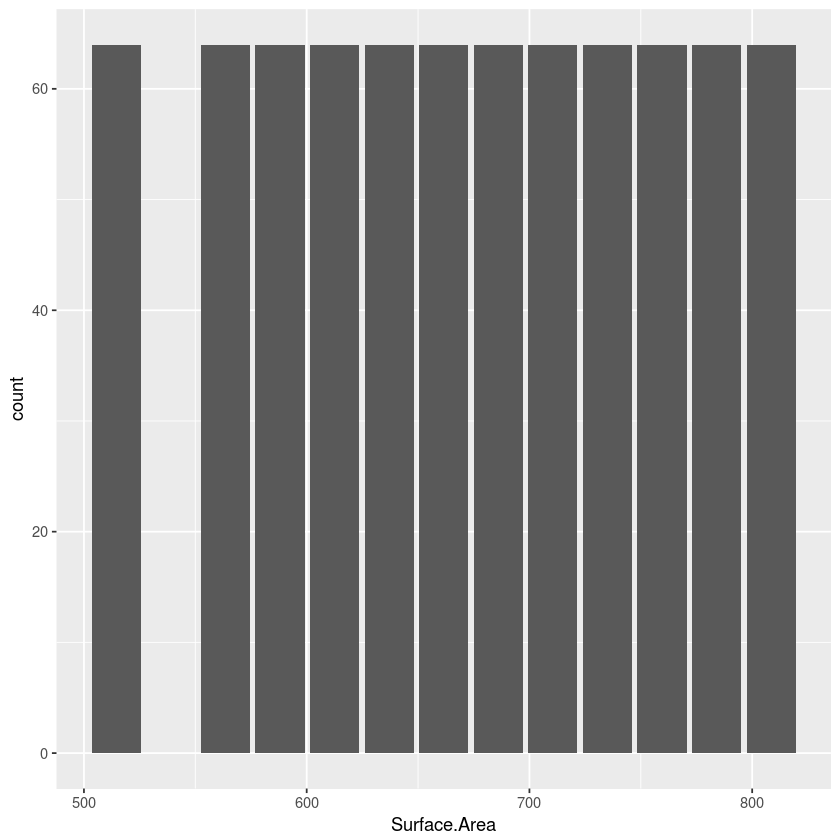

In [20]:
require(ggplot2)
ggplot(bldg.energy, aes(Surface.Area)) + ## Specify the data frame and columns. Note the + chain operator
     geom_bar()  ## Fuction for the plot type

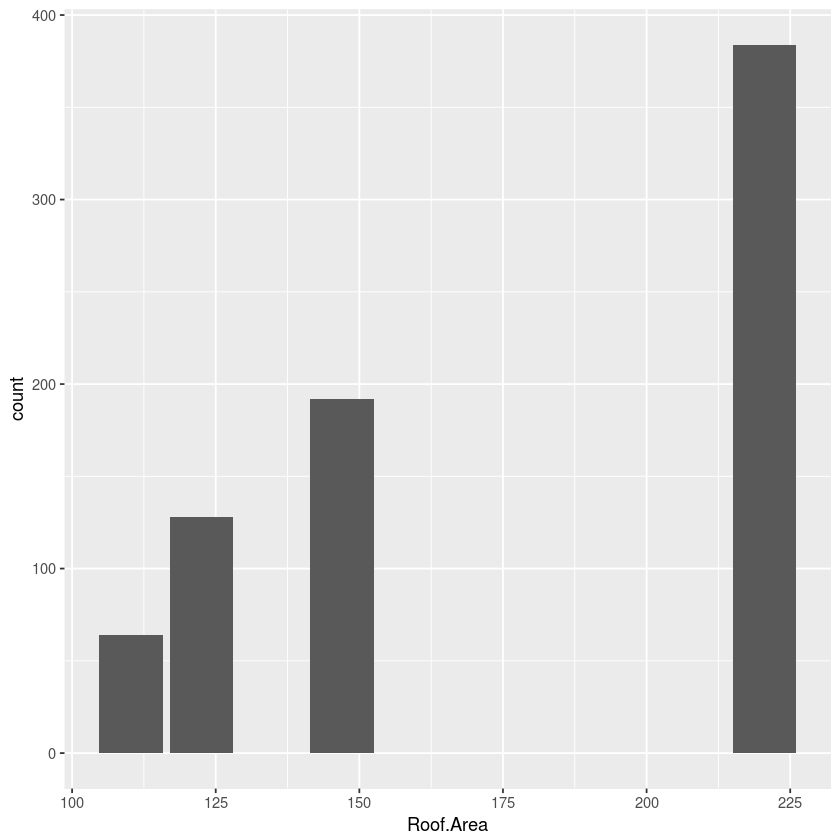

In [21]:
require(ggplot2)
ggplot(bldg.energy, aes(Roof.Area)) + ## Specify the data frame and columns. Note the + chain operator
     geom_bar()  ## Fuction for the plot type

## Histograms

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


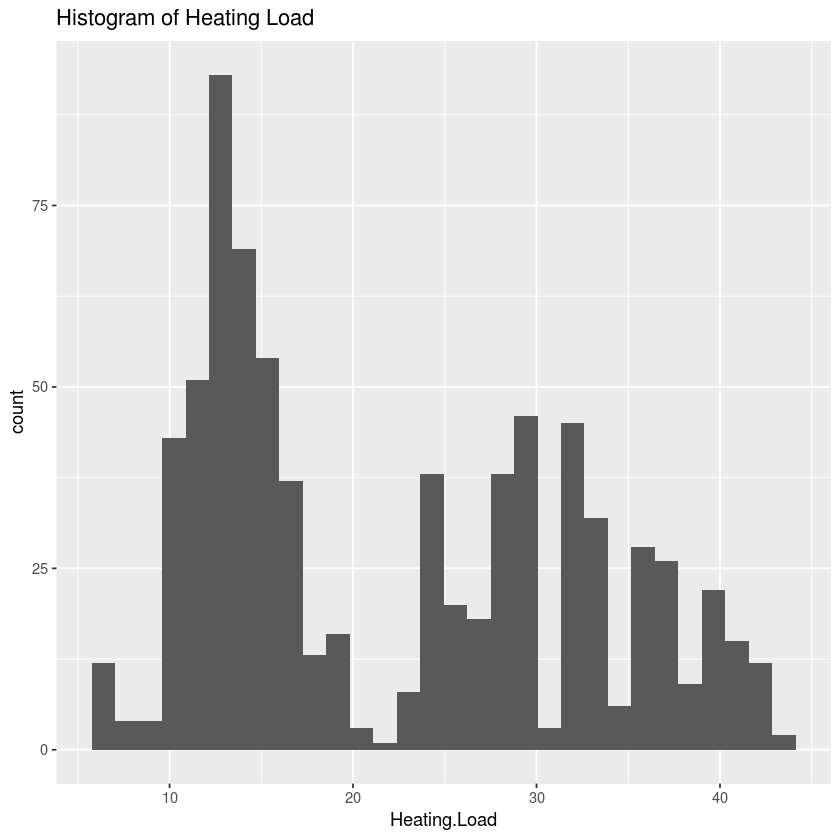

In [22]:
require(ggplot2)
ggplot(bldg.energy, aes(Heating.Load)) + ## Specify the data frame and columns. Note the + chain operator
     geom_histogram() + ## Fuction for the plot type 
     ggtitle('Histogram of Heating Load')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


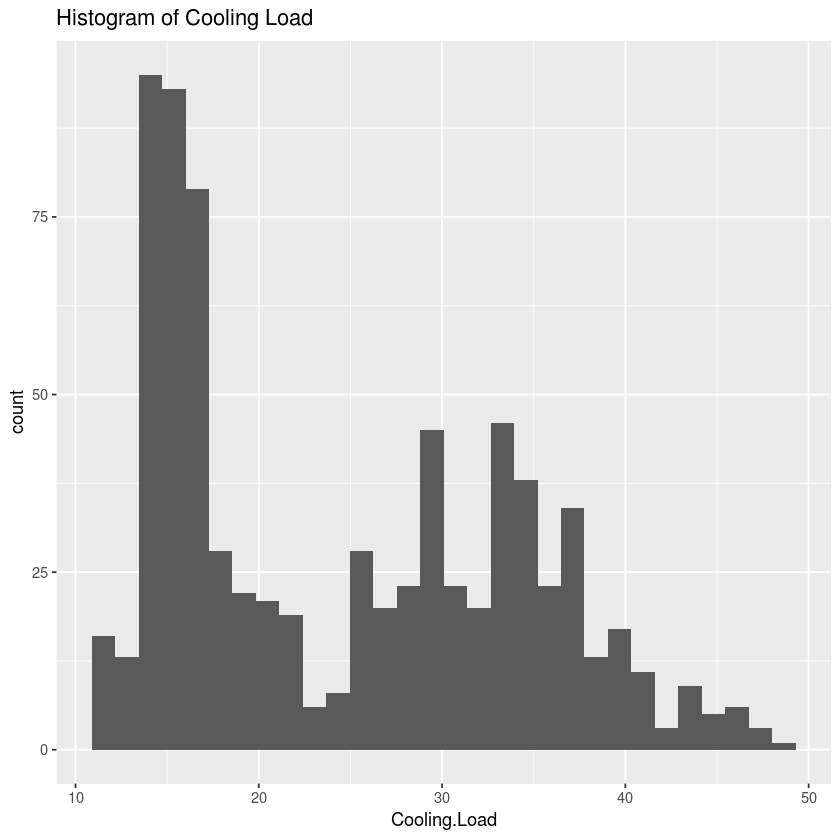

In [23]:
require(ggplot2)
ggplot(bldg.energy, aes(Cooling.Load)) + ## Specify the data frame and columns. Note the + chain operator
     geom_histogram() + ## Fuction for the plot type 
     ggtitle('Histogram of Cooling Load')

## Box Plots

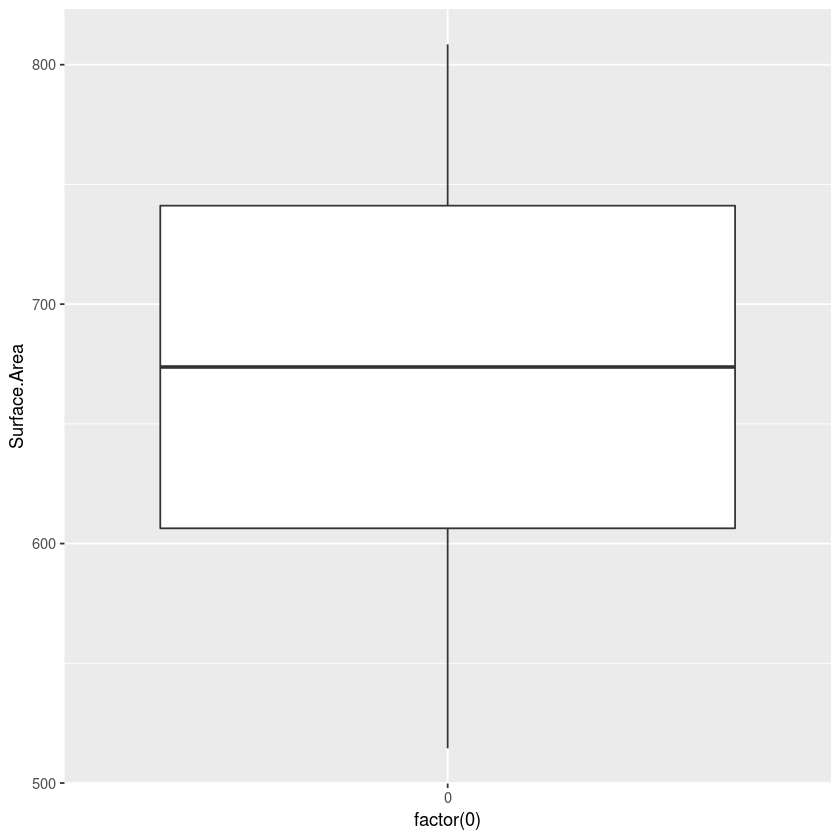

In [24]:
ggplot(bldg.energy, 
       aes(x = factor(0), 
           y = Surface.Area)) + 
geom_boxplot()

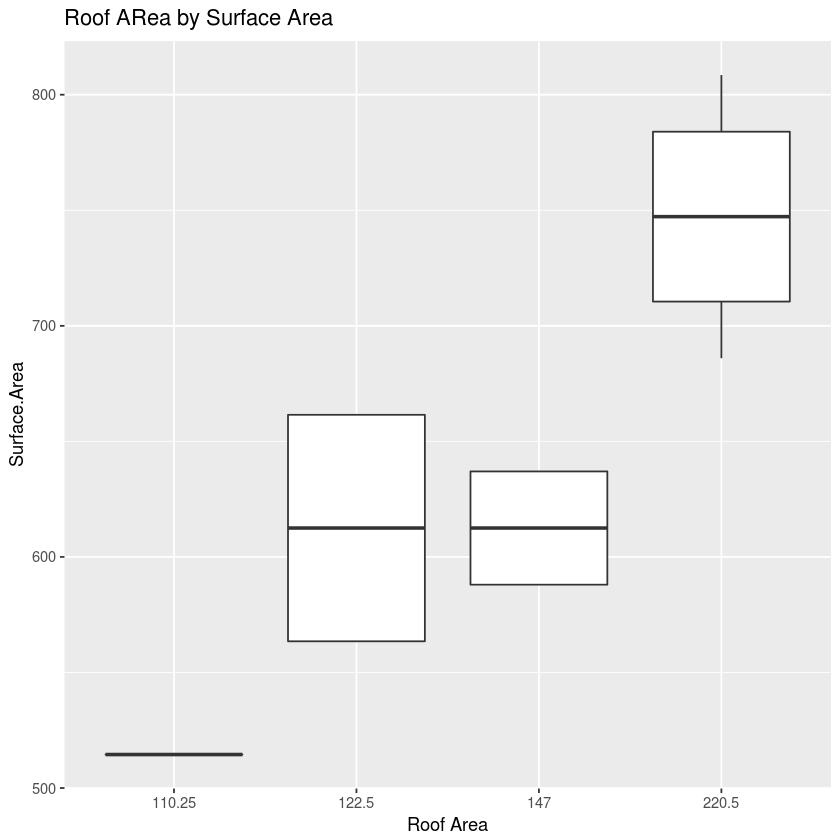

In [25]:
ggplot(bldg.energy, 
       aes(x = factor(Roof.Area), 
           y = Surface.Area)) + 
geom_boxplot() +
xlab('Roof Area') +
ggtitle('Roof ARea by Surface Area')

## Kernel density estimation

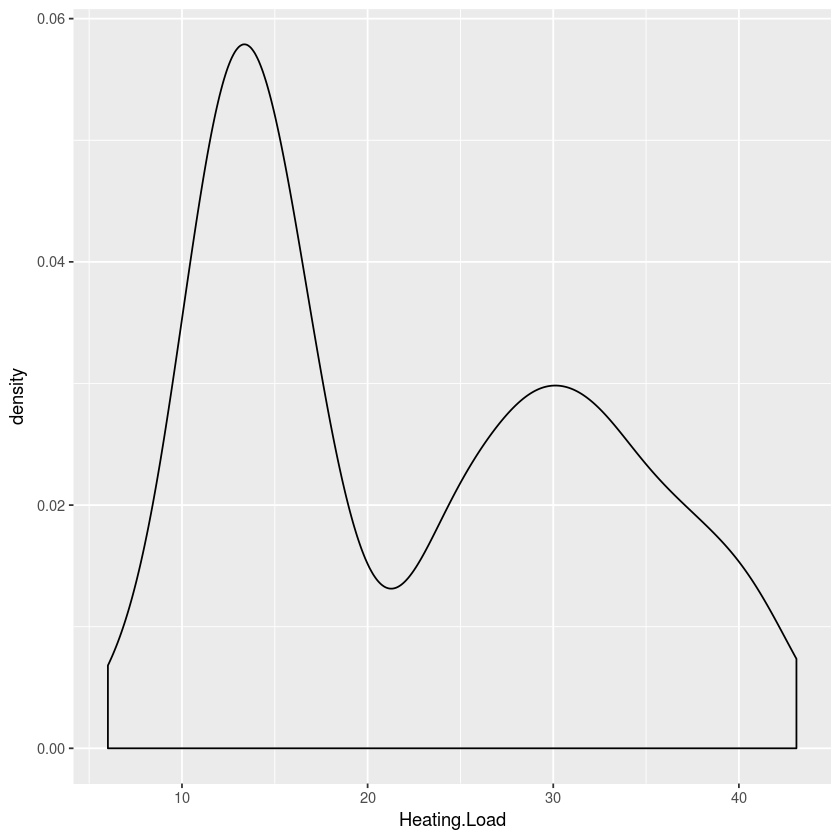

In [26]:
ggplot(bldg.energy, aes(Heating.Load)) + geom_density()

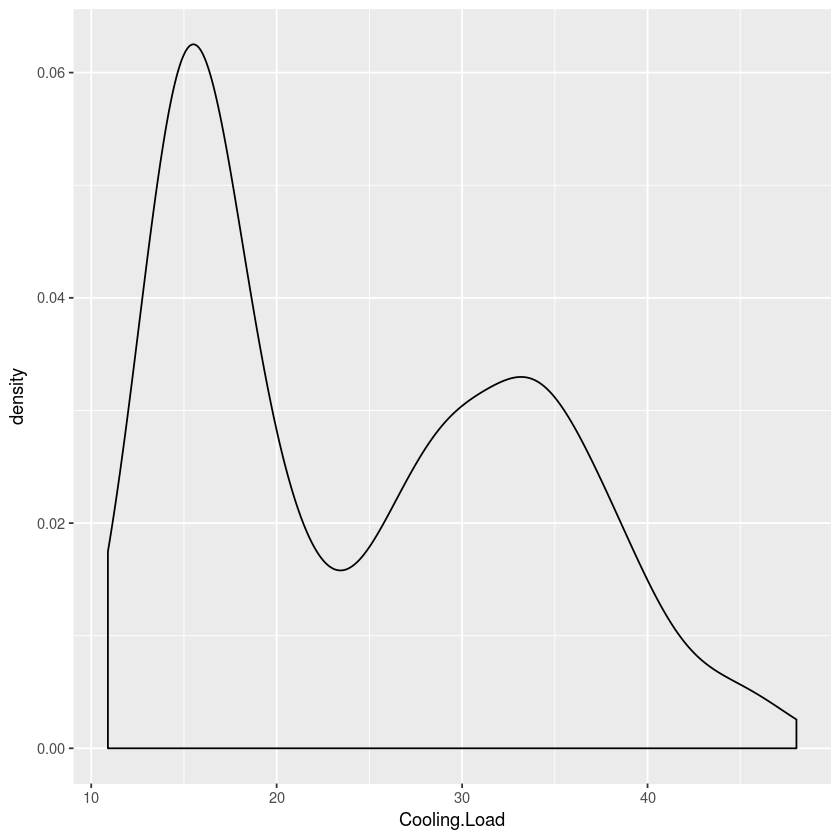

In [27]:
ggplot(bldg.energy, aes(Cooling.Load)) + geom_density()

## Violin Plots

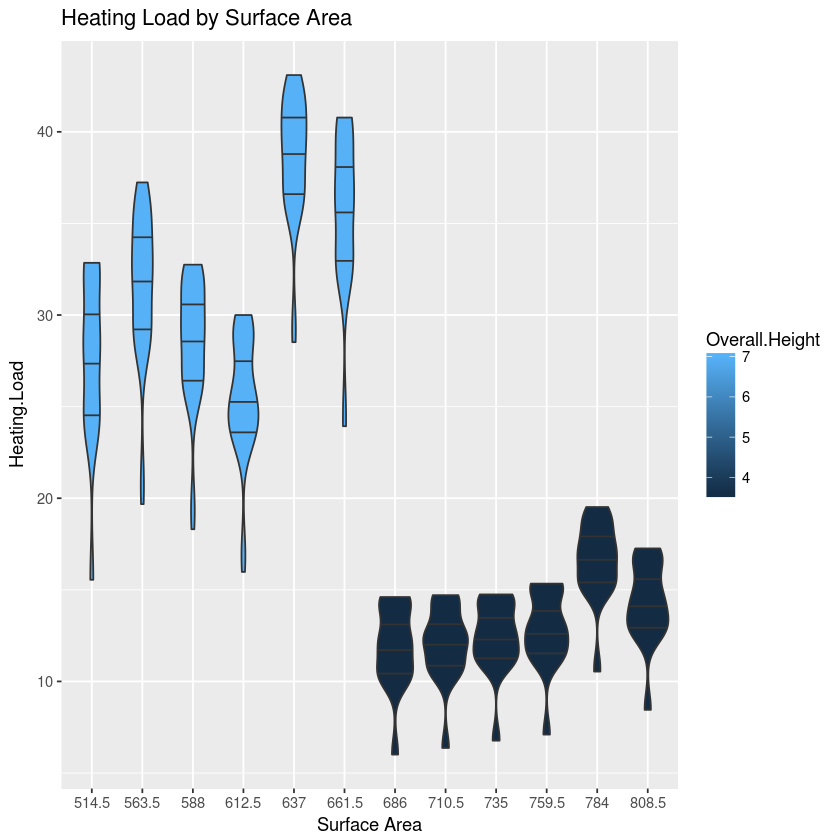

In [76]:
ggplot(bldg.energy, 
       aes(x = factor(Surface.Area), y = Heating.Load,
          fill = Overall.Height)) +
    geom_violin(trim = TRUE, 
                draw_quantiles = c(0.25, 0.5, 0.75)) +
    xlab('Surface Area')  + 
ggtitle('Heating Load by Surface Area')

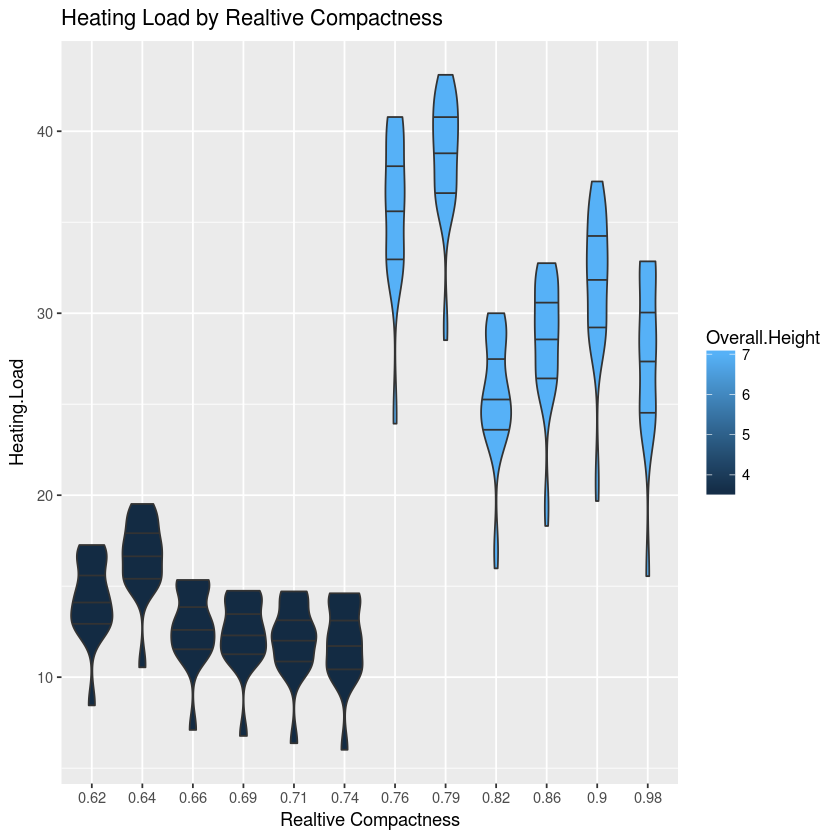

In [79]:
ggplot(bldg.energy, 
       aes(x = factor(Relative.Compactness), y = Heating.Load,
          fill = Overall.Height)) +
    geom_violin(trim = TRUE, 
                draw_quantiles = c(0.25, 0.5, 0.75)) +
    xlab('Realtive Compactness')  + 
ggtitle('Heating Load by Realtive Compactness')

# AHA! 
# Roof Area Doesn't Matter; Height Does!

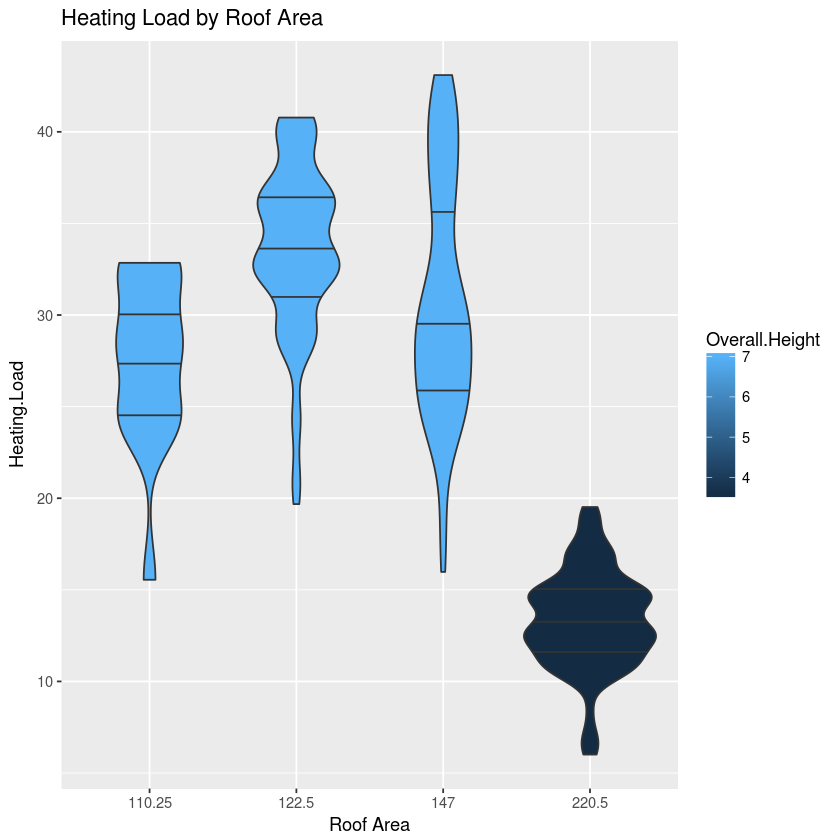

In [70]:
ggplot(bldg.energy, 
       aes(x = factor(Roof.Area), y = Heating.Load,
          fill = Overall.Height)) +
    geom_violin(trim = TRUE, 
                draw_quantiles = c(0.25, 0.5, 0.75)) +
    xlab('Roof Area')  + 
ggtitle('Heating Load by Roof Area')

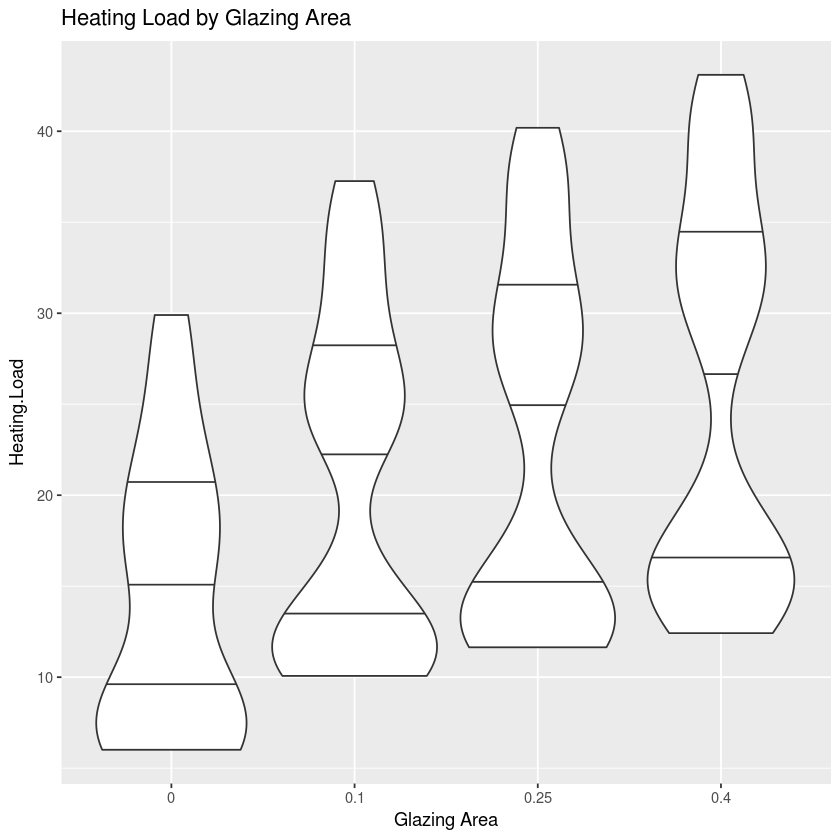

In [74]:
ggplot(bldg.energy, 
       aes(x = factor(Glazing.Area), y = Heating.Load,
          color = Overall.Height)) +
    geom_violin(trim = TRUE, 
                draw_quantiles = c(0.25, 0.5, 0.75)) +
    xlab('Glazing Area')  + 
ggtitle('Heating Load by Glazing Area')

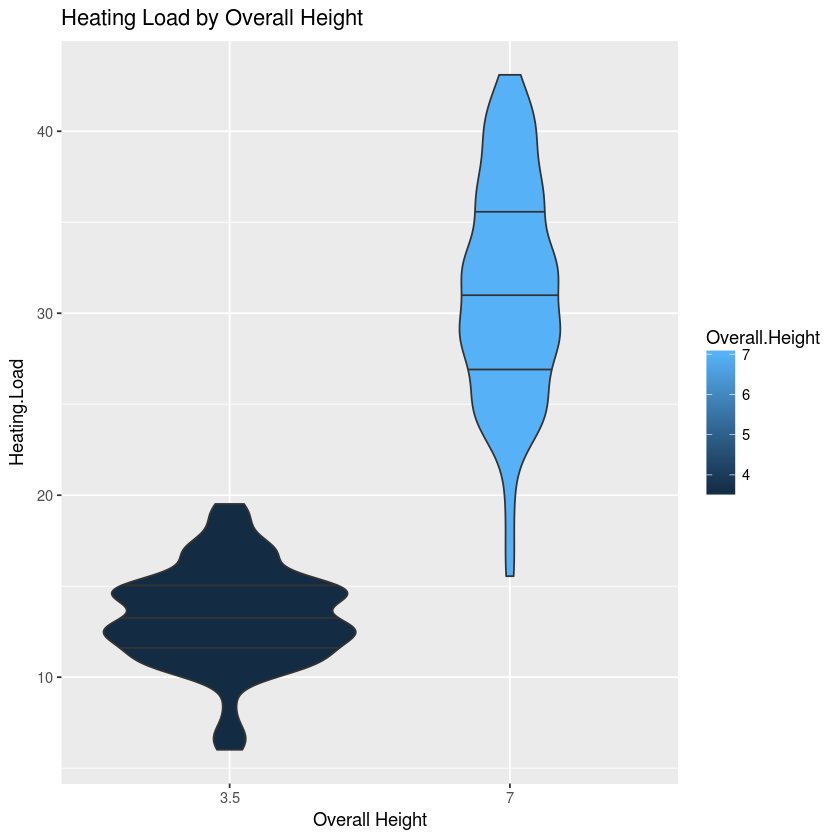

In [75]:
ggplot(bldg.energy, 
       aes(x = factor(Overall.Height), y = Heating.Load,
          fill = Overall.Height)) +
    geom_violin(trim = TRUE, 
                draw_quantiles = c(0.25, 0.5, 0.75)) +
    xlab('Overall Height')  + 
ggtitle('Heating Load by Overall Height')

## Statter Plots

Once gain, moving straight to correlation. Roof Area and Overall Height have the strongest correlation to heating & cooling load, followed by Wall area. Orientatin's irrelavent, Glazing Area & Distribution doesn't mean much either.

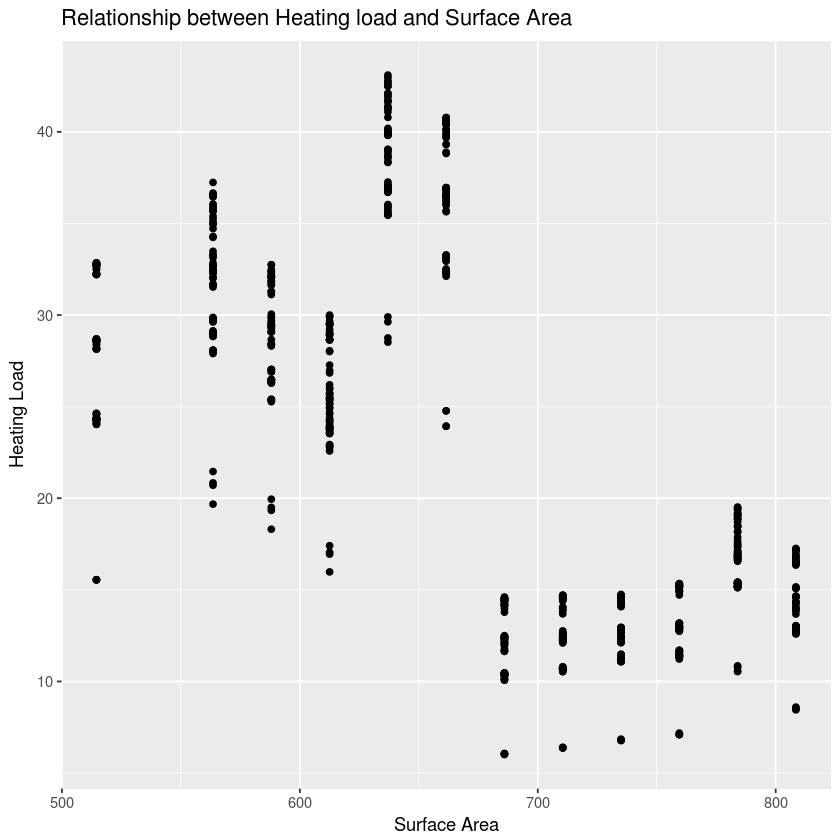

In [43]:
ggplot(bldg.energy, 
       aes(x = Surface.Area, y = Heating.Load)) + 
geom_point() + 
xlab('Surface Area') + 
ylab('Heating Load') + 
ggtitle('Relationship between Heating load and Surface Area')

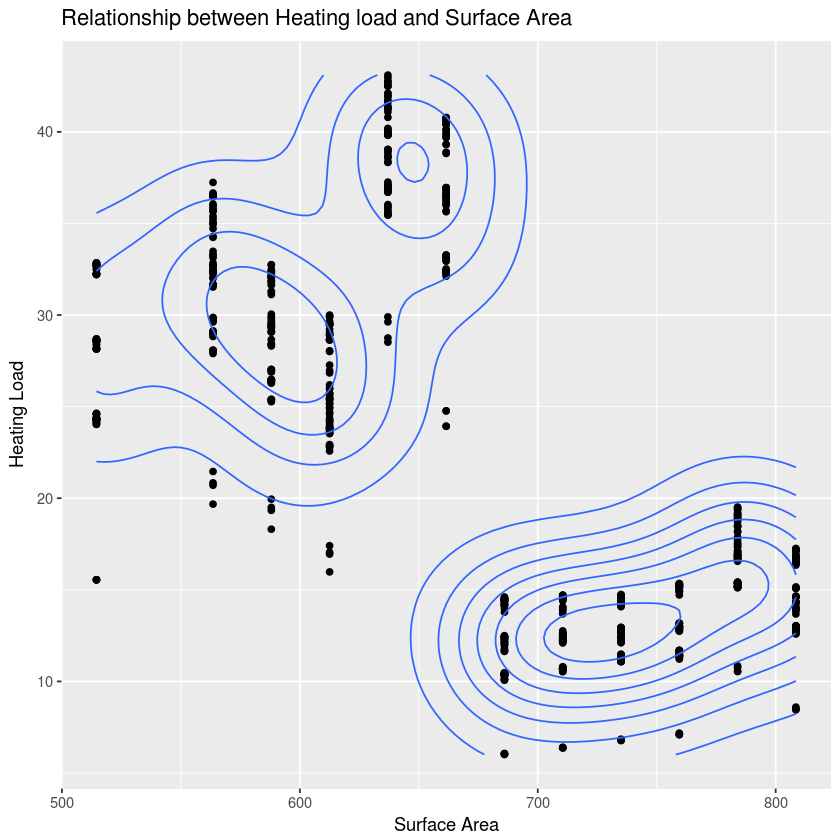

In [44]:
ggplot(bldg.energy, 
       aes(x = Surface.Area, y = Heating.Load)) + 
geom_point() + 
geom_density2d() +
xlab('Surface Area') + 
ylab('Heating Load') + 
ggtitle('Relationship between Heating load and Surface Area')

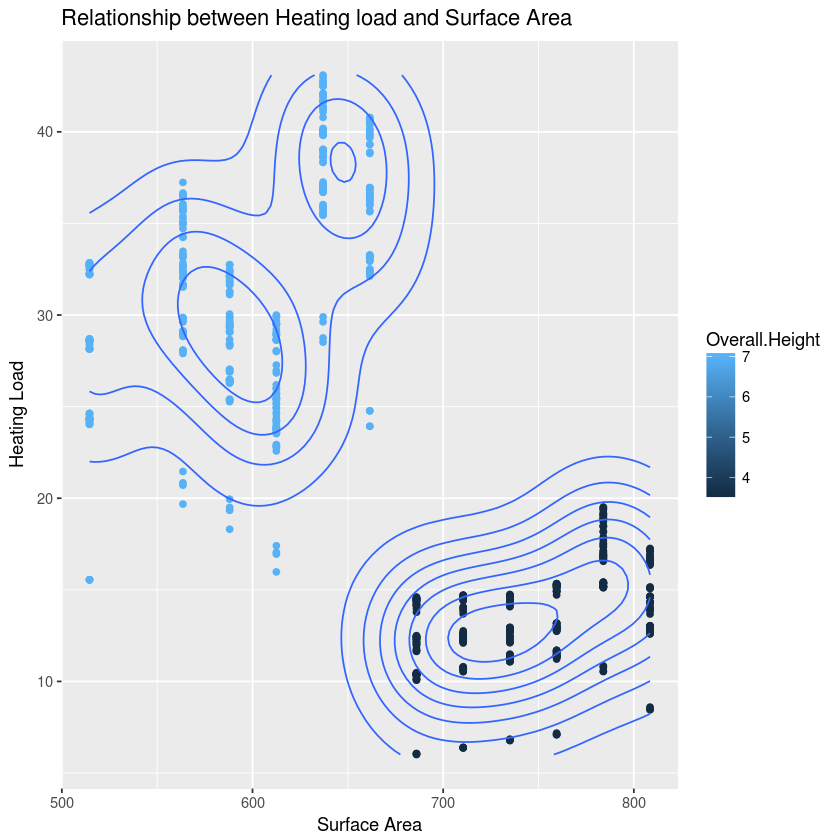

In [46]:
ggplot(bldg.energy, 
       aes(x = Surface.Area, 
           y = Heating.Load,
           color = Overall.Height)) + 
geom_point() + 
geom_density2d() +
xlab('Surface Area') + 
ylab('Heating Load') + 
ggtitle('Relationship between Heating load and Surface Area')

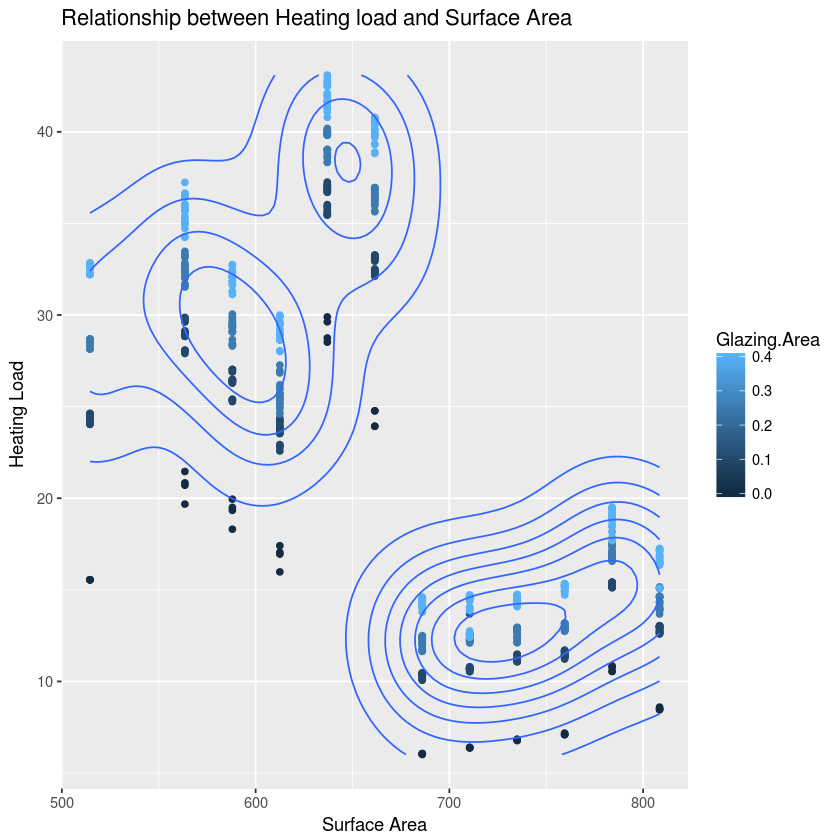

In [48]:
ggplot(bldg.energy, 
       aes(x = Surface.Area, 
           y = Heating.Load,
           color = Glazing.Area)) + 
geom_point() + 
geom_density2d() +
xlab('Surface Area') + 
ylab('Heating Load') + 
ggtitle('Relationship between Heating load and Surface Area')

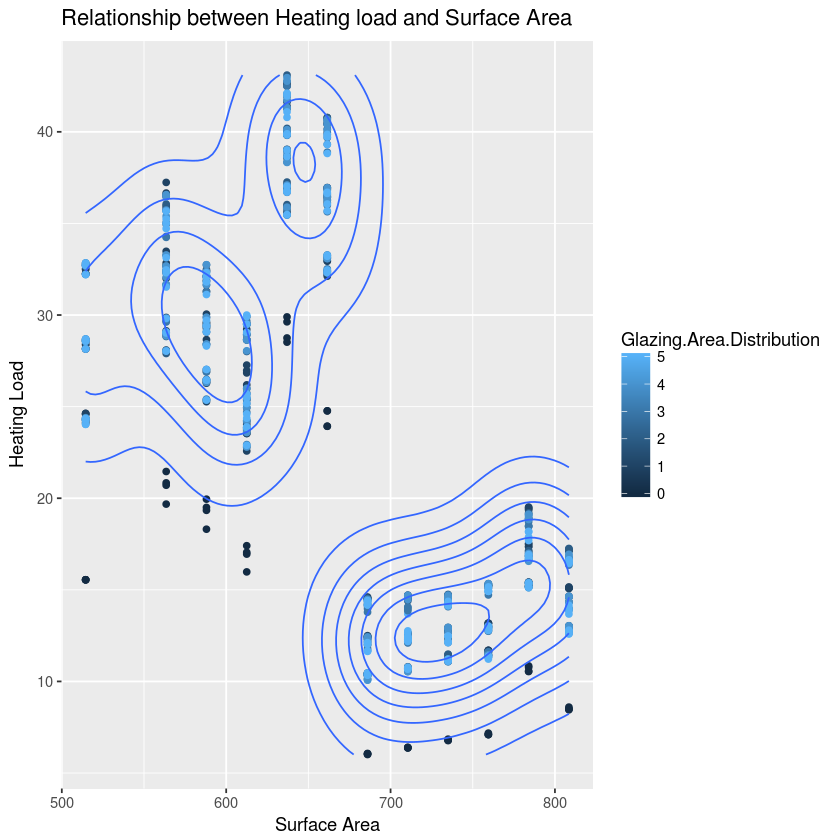

In [52]:
ggplot(bldg.energy, 
       aes(x = Surface.Area, 
           y = Heating.Load,
           color = Glazing.Area.Distribution)) + 
geom_point() + 
geom_density2d() +
xlab('Surface Area') + 
ylab('Heating Load') + 
ggtitle('Relationship between Heating load and Surface Area')

I'm going to avoid talking about covariance so I don't get a headache; moving straight to correlation. There's a strong correlation between Relative.Compactness and Overall.Height, a weak corelation betwen Glazing.Area and Glazing.Area.Distribution; all other correlatioans are neglitible.

Let's open the aperture a bit and look at the rest of the buidlign energy dataset.

## Scatterplot matrices (I hope)
Code based on [Scatterplot matrices with ggplot](https://gastonsanchez.wordpress.com/2012/08/27/scatterplot-matrices-with-ggplot/) by [Gaston Scanchez](http://www.gastonsanchez.com/) in [Data Anaysis Visually Enforced](https://gastonsanchez.wordpress.com/)

Background color from [pakt](https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781849513067/2/ch02lvl1sec03/setting-plot-background-colors)

Dot color form [stack overflow](https://stackoverflow.com/questions/15599717/coloring-points-in-a-pairs-plot)

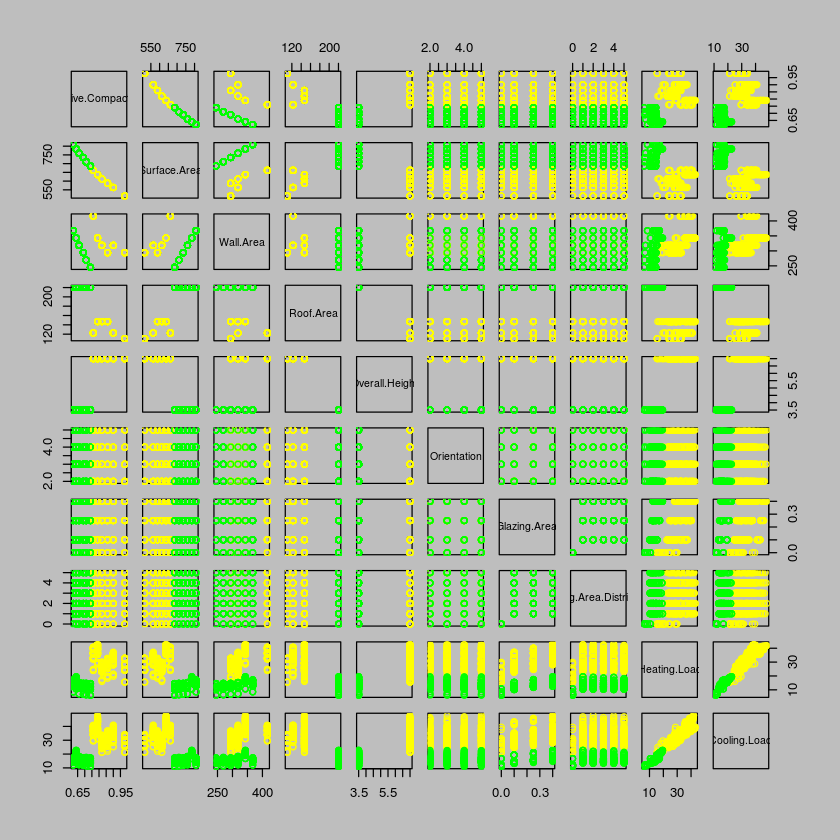

In [34]:
par(bg="gray")

cols2 <- character(nrow(bldg.energy))
cols2[] <- "black"
cols2[bldg.energy$Overall.Height == 3.5] <- "green"
cols2[bldg.energy$Overall.Height == 7] <- "yellow"

pairs(bldg.energy[,0:10], col=cols2)

In [64]:
bldg.interesting = bldg.energy[, c('Relative.Compactness', 
                               'Surface.Area',
                               'Wall.Area',
                               'Heating.Load',
                               'Cooling.Load',
                               'Overall.Height',
                               'Glazing.Area')]

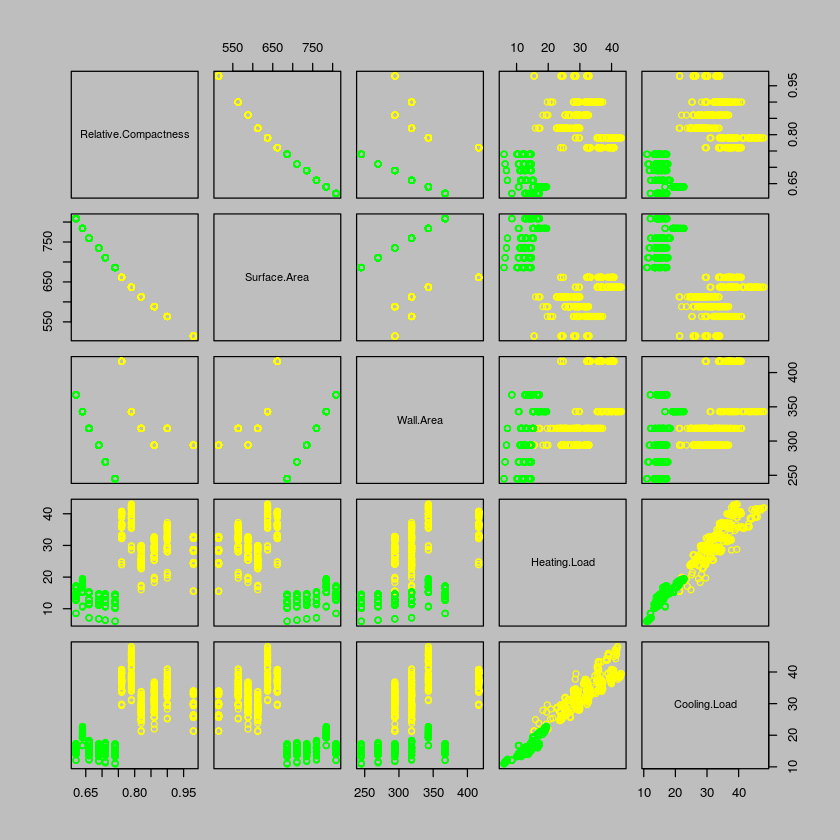

In [66]:
par(bg="gray")

cols2 <- character(nrow(bldg.energy))
cols2[] <- "black"
cols2[bldg.interesting$Overall.Height == 3.5] <- "green"
cols2[bldg.interesting$Overall.Height == 7] <- "yellow"

pairs(bldg.interesting[,0:5], col=cols2)

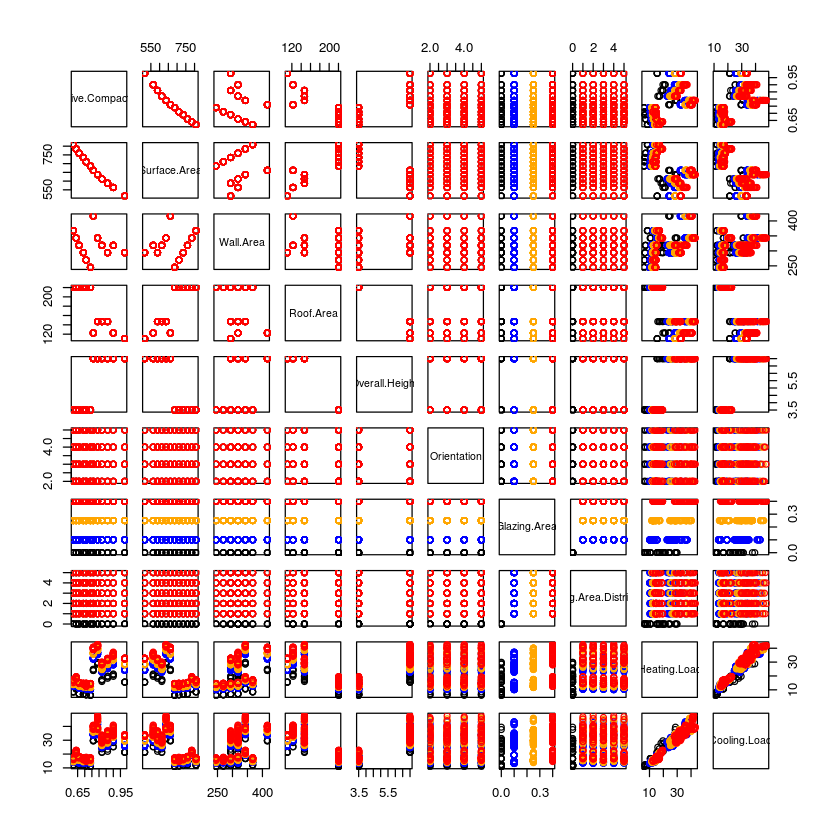

In [61]:
cols4 <- character(nrow(bldg.energy))
cols4[] <- "black"

cols4[bldg.energy == 0] <- "gray"
cols4[bldg.energy$Glazing.Area == 0.1] <- "blue"
cols4[bldg.energy$Glazing.Area == 0.25] <- "orange"
cols4[bldg.energy$Glazing.Area == 0.4] <- "red"

pairs(bldg.energy,col=cols4)

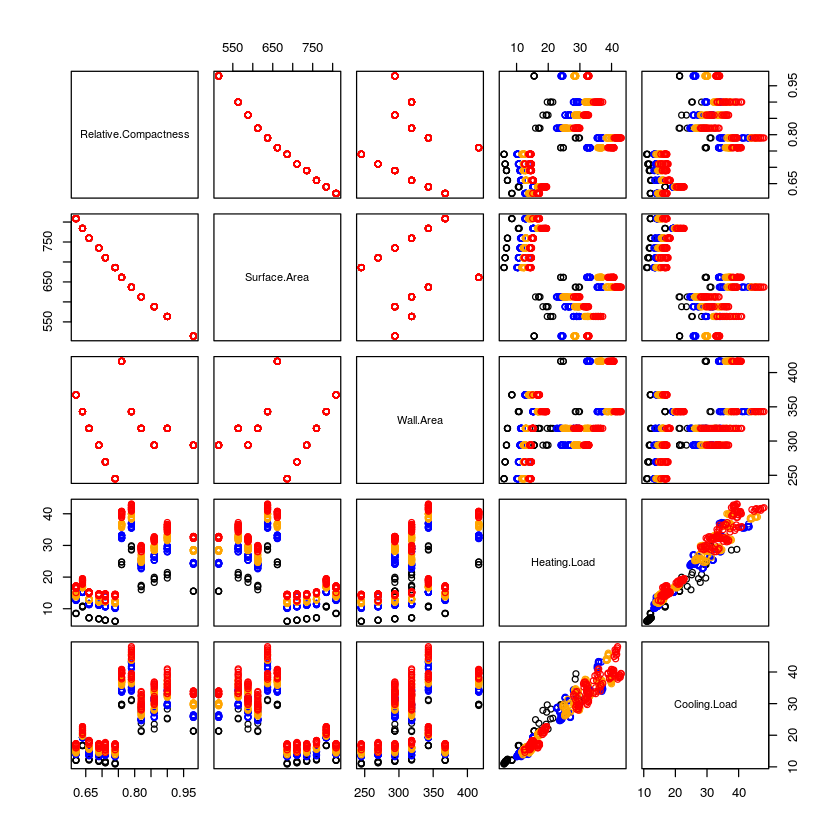

In [67]:
cols4 <- character(nrow(bldg.energy))
cols4[] <- "black"

cols4[bldg.interesting == 0] <- "gray"
cols4[bldg.interesting$Glazing.Area == 0.1] <- "blue"
cols4[bldg.interesting$Glazing.Area == 0.25] <- "orange"
cols4[bldg.interesting$Glazing.Area == 0.4] <- "red"

pairs(bldg.interesting[,0:5],col=cols4)

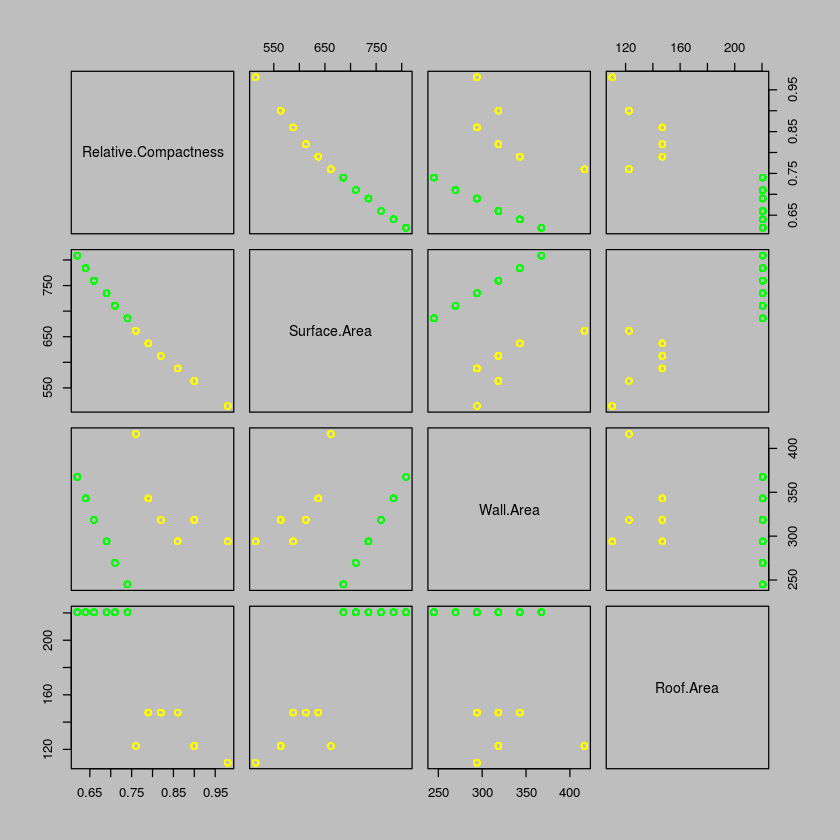

In [37]:
par(bg="gray")
pairs(bldg.energy[,0:4], col=cols2)

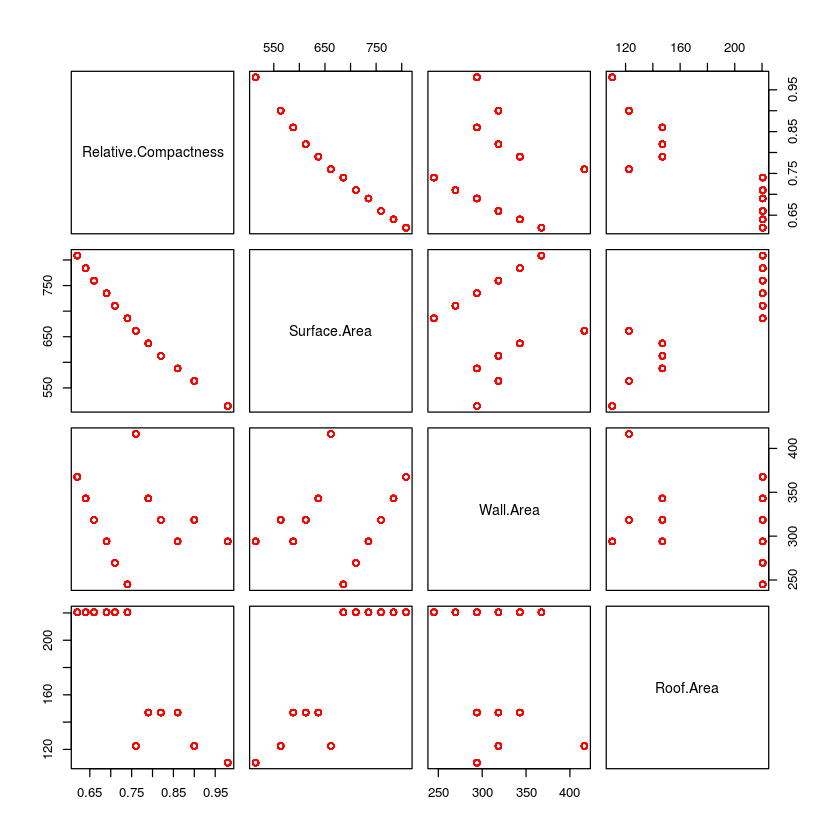

In [38]:
pairs(bldg.energy[,0:4], col=cols4)

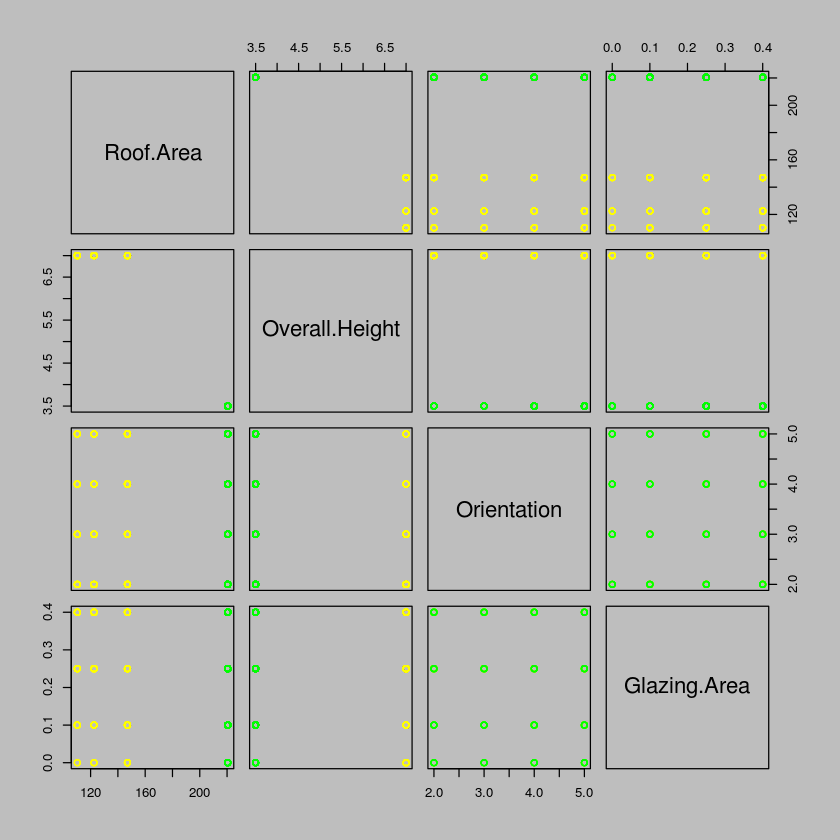

In [39]:
par(bg="gray")
pairs(bldg.energy[,4:7], col=cols2)

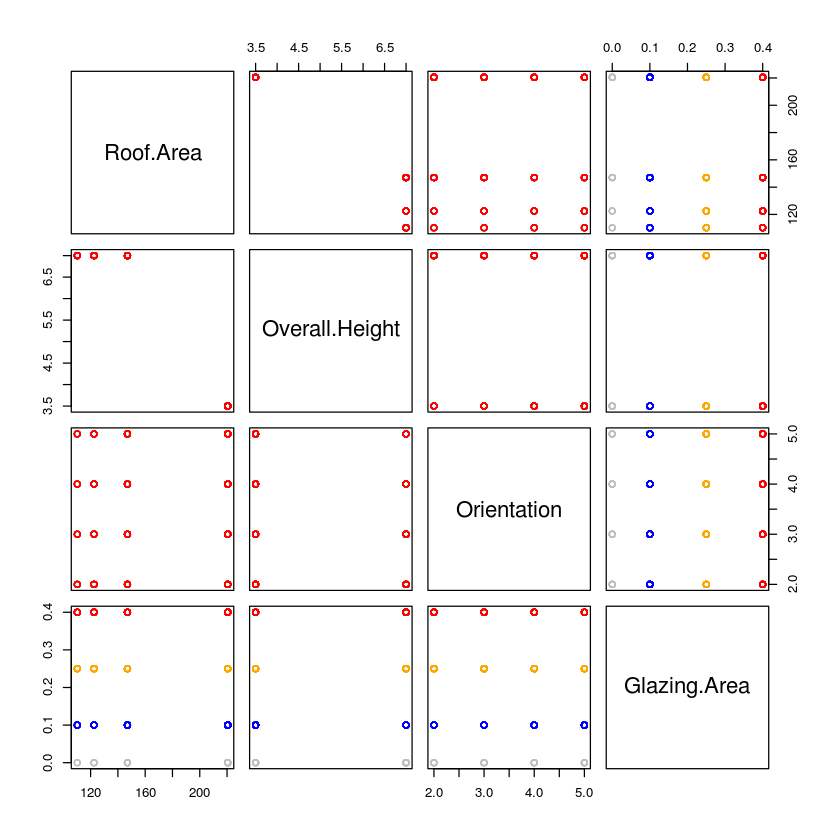

In [40]:
pairs(bldg.energy[,4:7], col=cols4)

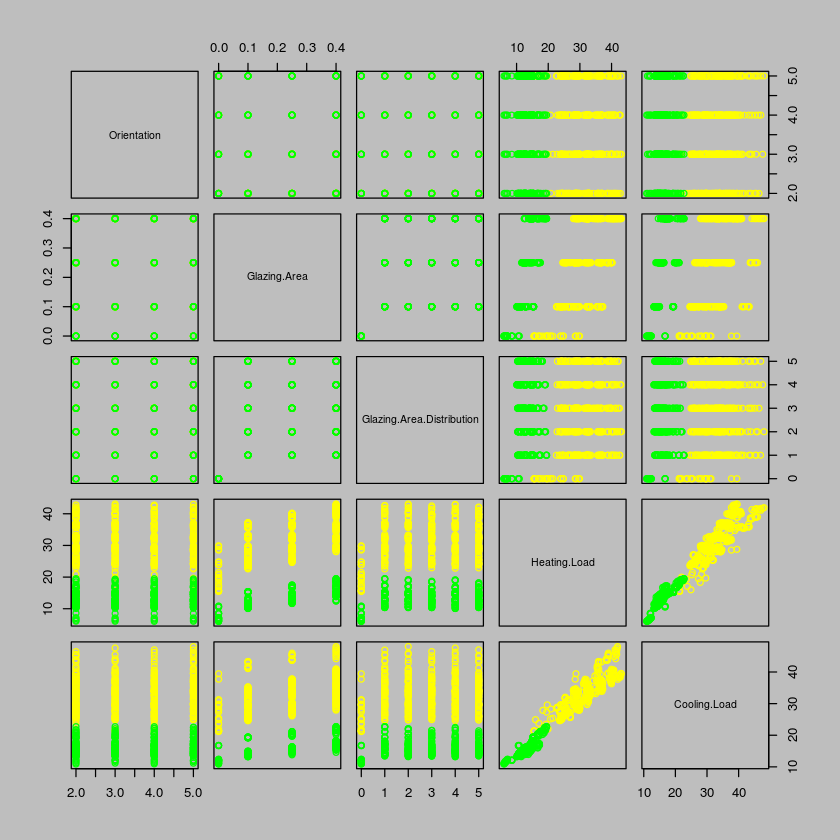

In [41]:
par(bg="gray")
pairs(bldg.energy[,6:10], col=cols2)

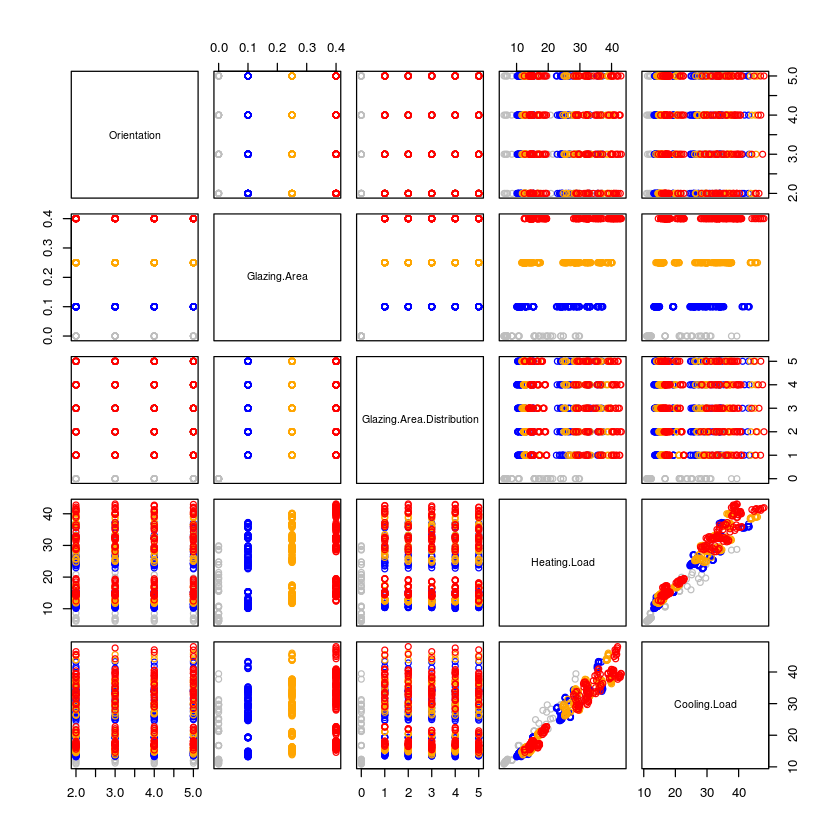

In [42]:
pairs(bldg.energy[,6:10], col=cols4)